In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
from definitions import *

In [2]:
def angsep(ra1,dec1,ra2,dec2):
    SEP = numpy.cos(dec1*numpy.pi/180)*numpy.cos(dec2*numpy.pi/180)*numpy.cos((ra1-ra2)*numpy.pi/180)
    SEP += numpy.sin(dec1*numpy.pi/180)*numpy.sin(dec2*numpy.pi/180) #returns values between 0 and pi radians
    SEP = numpy.arccos(SEP)
    return SEP*180./numpy.pi

In [3]:
pd_common_gevtevxmm = pd.read_csv("markeddata/pd_gevtevxmm_simbadclasses_normalized.txt", sep='\t')

In [4]:
pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] != 0]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,s_class,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked
190,0.000000e+00,0.000000e+00,7.023552e-06,0.000000,0.000075,0.014498,0.216180,0.331050,0.099179,0.322267,...,['B0Ve'],b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1
1012,4.865135e-06,1.698195e-05,9.579073e-06,0.000002,0.000000,0.006512,0.225777,0.309700,0.088957,0.355722,...,['B0Ve'],b'1FGL J1018.6-5856 ',b'HMB ',284.351227,-1.690106,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1
4158,5.424061e-07,7.192430e-08,8.977810e-07,0.000023,0.000048,0.007597,0.117056,0.309327,0.034503,0.203525,...,['B0Ve'],b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1
4667,4.073749e-07,1.218059e-06,1.198334e-05,0.000053,0.000028,0.022407,0.362226,0.111720,0.253923,0.249629,...,['B0Ve'],b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1


In [5]:
pd_common_gevtevxmm

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,s_class,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked
0,1.055903e-04,2.876860e-03,6.991028e-03,2.775877e-03,4.379479e-05,0.068235,0.072236,3.362987e-03,0.037834,0.143753,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
1,6.926993e-06,2.314314e-05,4.962910e-03,2.945640e-03,7.314919e-06,0.068570,0.072590,3.379500e-03,0.038020,0.144459,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
2,4.203329e-04,4.093101e-03,7.040157e-03,1.724927e-03,0.000000e+00,0.068201,0.072200,3.361334e-03,0.037816,0.143682,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
3,6.579960e-05,2.109766e-03,3.126568e-03,4.607690e-04,3.916357e-06,0.068721,0.072750,3.386923e-03,0.038104,0.144776,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
4,1.375578e-04,2.943576e-03,1.537252e-04,0.000000e+00,8.538090e-04,0.068837,0.072873,3.392640e-03,0.038168,0.145020,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
5,3.794388e-05,1.253968e-03,5.341196e-04,4.803246e-04,1.001614e-04,0.068953,0.072996,3.398370e-03,0.038232,0.145265,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
6,4.242516e-04,5.392530e-03,1.274985e-02,9.707989e-03,1.669567e-04,0.067153,0.071091,3.309680e-03,0.037235,0.141474,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
7,9.095900e-03,1.382516e-01,3.406841e-01,3.017181e-01,8.484584e-02,0.008668,0.009176,4.271987e-04,0.004806,0.018261,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
8,3.415853e-05,2.530081e-03,4.219403e-03,2.805118e-03,6.929703e-08,0.068456,0.072470,3.373903e-03,0.037957,0.144219,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
9,2.858962e-05,1.240907e-03,1.170378e-03,0.000000e+00,1.072419e-06,0.068950,0.072993,3.398253e-03,0.038231,0.145260,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0


In [6]:
pd_common_gevtevxmm = pd_common_gevtevxmm.loc[:, ~pd_common_gevtevxmm.columns.str.contains('^Unnamed')]

In [7]:
spectra_columns = list_xmm_spectra_columns() + list_gev_spectrum_columns() + list_tev_spectrum_columns()
other_columns = list_xmm_other_columns() + list_gev_other_columns() + list_tev_other_columns()

In [8]:
def show_marked_spectra(spectra_columns, spectra):
    plt.clf()
    fig, ax = plt.subplots(figsize=(16,6))
    marked_spectra = spectra[spectra['marked'] == 1]
    
    for i in range(0,len(marked_spectra)):
        table = marked_spectra[spectra_columns].iloc[i]
        values = table.values

        spectra_points_number = len(spectra_columns)
        plt.xticks(())
        #if i == 0:
        #    plt.setp([plt], title='Normalized columns')
        if i == 3:
            #plt.set_xlabel('optics - gev - tev')
            plt.xticks(range(spectra_points_number), spectra_columns,rotation=45)
        ax.plot(range(len(values)), marked_spectra[spectra_columns].iloc[i].values, label=marked_spectra['gev_1FGL_Name'].values[i])
        legend = ax.legend(loc = 'upper right')   
    plt.show()

In [9]:
(pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] == 1])[['gev_1FGL_Name', 's_MAIN_ID', 's_class', 'tev_glat', 'tev_glon']]

,gev_1FGL_Name,s_MAIN_ID,s_class,tev_glat,tev_glon
190,b'1FGL J0240.5+6113 ',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1.086135,135.675278
1012,b'1FGL J1018.6-5856 ',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],-1.779517,284.314087
4158,b'1FGL J1826.2-1450 ',"[""b'V* V479 Sct'""]",['B0Ve'],-1.289216,16.881586
4667,b'1FGL J2032.2+4127 ',"[""b'[MT91] 213'"" ""b'Schulte 21'""]",['B0Ve'],1.111117,80.299477


<Figure size 432x288 with 0 Axes>

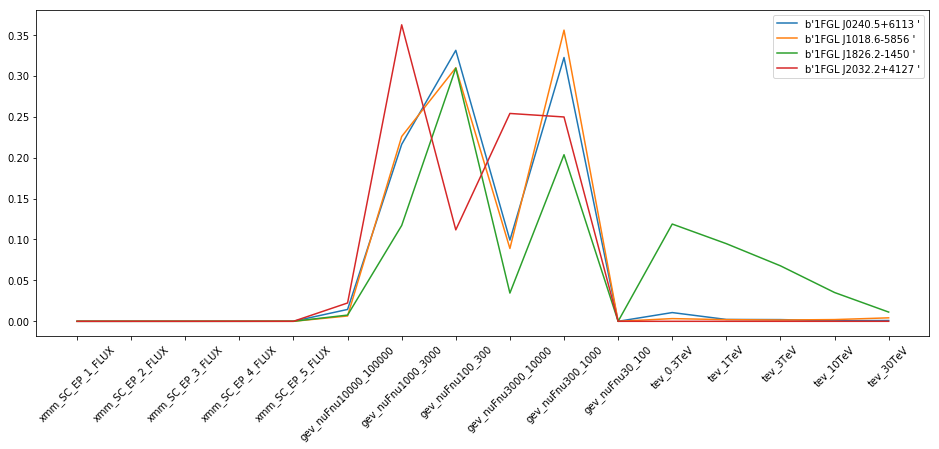

In [10]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

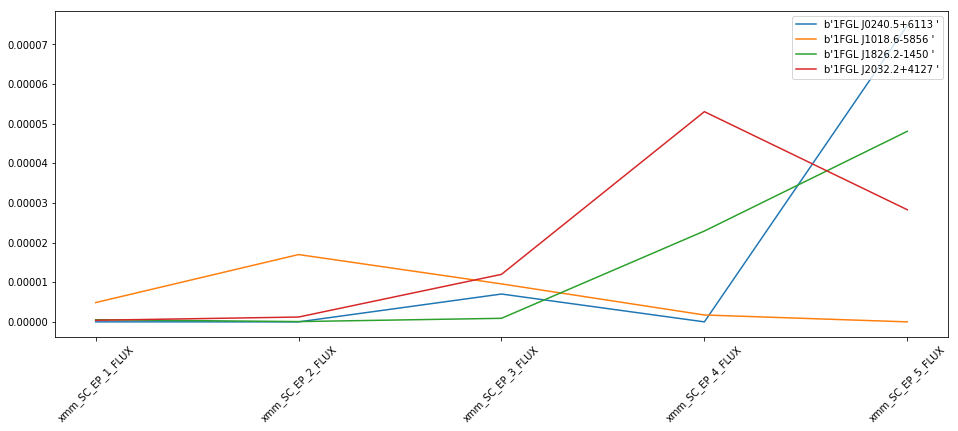

In [11]:
show_marked_spectra(list_xmm_spectra_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

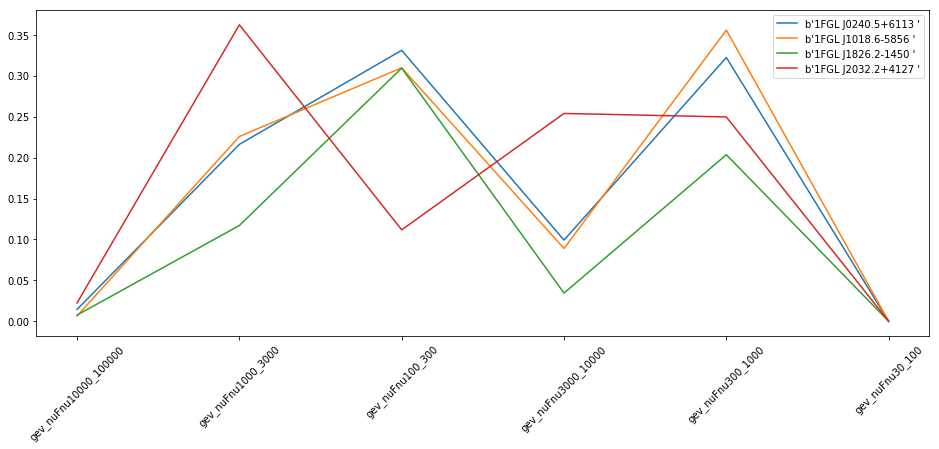

In [12]:
show_marked_spectra(list_gev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

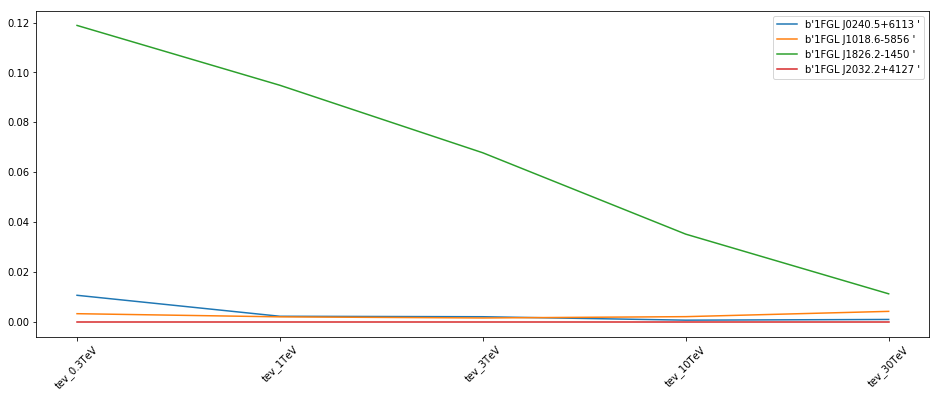

In [13]:
show_marked_spectra(list_tev_spectrum_columns(), pd_common_gevtevxmm)